In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
TBI_Pos = '/content/drive/MyDrive/TBI-Pos'
TBI_Neg = '/content/drive/MyDrive/TBI-Neg'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [8]:
data_pos = pd.read_csv('/content/drive/MyDrive/103-DOD-tts_all.csv')
data_neg = pd.read_csv('/content/drive/MyDrive/205-DOD-tts_all.csv')

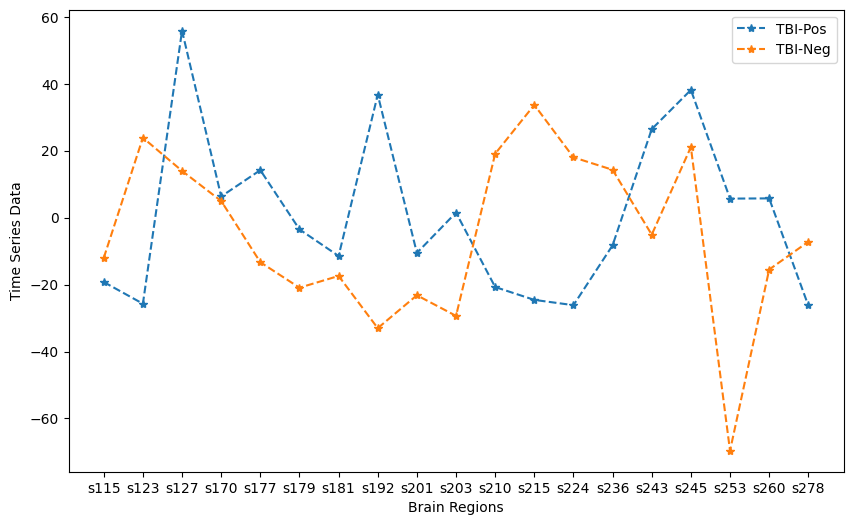

In [9]:

# Load the first CSV file and select the desired columns and rows
data1 = pd.read_csv('/content/drive/MyDrive/102-DOD-tts_all.csv', usecols=['s177', 's115', 's243', 's127', 's215', 's260', 's170', 's179', 's224', 's236', 's278', 's123', 's210', 's253', 's203', 's192', 's245', 's201','s181'], nrows=1)
# Load the second CSV file and select the desired columns and rows
data2 = pd.read_csv('/content/drive/MyDrive/202-DOD-tts_all.csv', usecols=['s177', 's115', 's243', 's127', 's215', 's260', 's170', 's179', 's224', 's236', 's278', 's123', 's210', 's253', 's203', 's192', 's245', 's201','s181'], nrows=1)


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Define x values
x = range(len(data1.columns))

# Plot the data from the first CSV file
ax.plot(x, data1.iloc[0], label='TBI-Pos', marker='*', linestyle='--')

# Plot the data from the second CSV file
ax.plot(x, data2.iloc[0], label='TBI-Neg', marker='*', linestyle='--')


# Add x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(data1.columns)

# Add a legend and axis labels
ax.legend()
ax.set_xlabel('Brain Regions')
ax.set_ylabel('Time Series Data')

# Show the plot
plt.show()


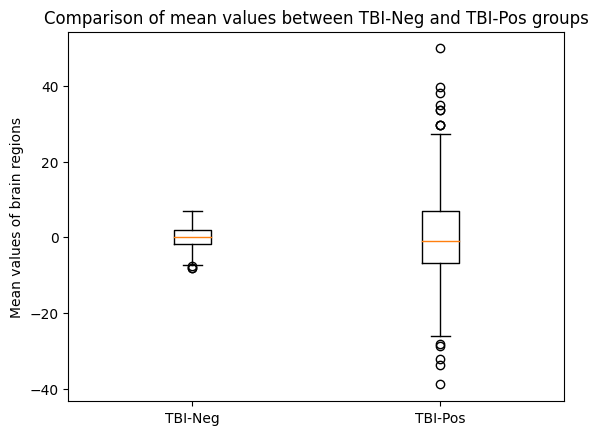

In [12]:

# Extract the mean values for each brain region across all time points
means_pos = data_pos.mean(axis=1)
means_neg = data_neg.mean(axis=1)

# Combine the mean values into a list for plotting
means_list = [means_neg, means_pos]

# Create a box plot
plt.boxplot(means_list)

# Add labels and title
plt.xticks([1, 2], ['TBI-Neg', 'TBI-Pos'])
plt.ylabel('Mean values of brain regions')
plt.title('Comparison of mean values between TBI-Neg and TBI-Pos groups')

# Show the plot
plt.show()

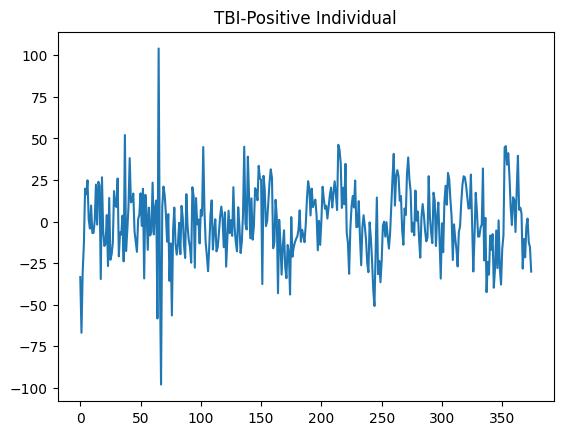

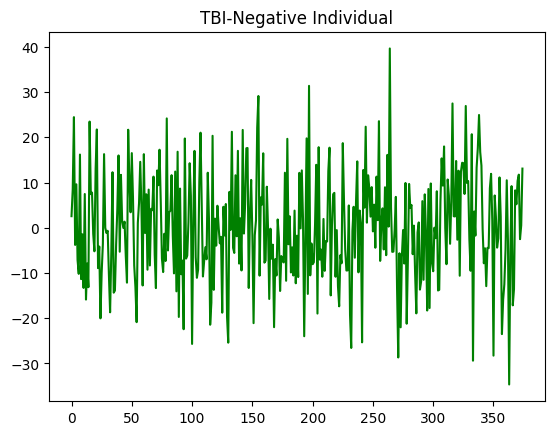

In [5]:

training_set = data_pos.iloc[:,1:2].values

plt.plot(training_set, label = 'TBI-Pos data')
plt.title('TBI-Positive Individual')
plt.show()

neg_Data = data_neg.iloc[:,1:2].values
plt.plot(neg_Data, label = 'TBI-Neg data', color= 'green')
plt.title('TBI-Negative Individual')
plt.show()

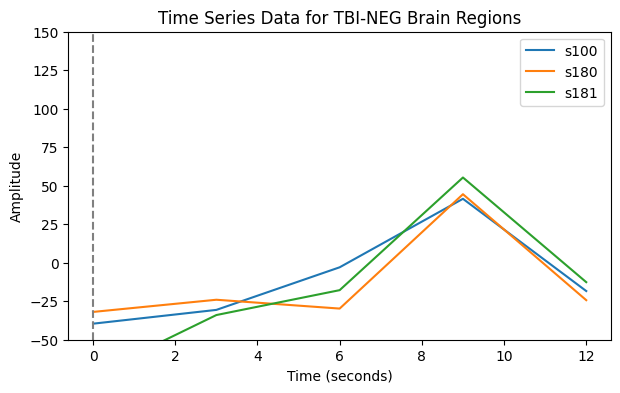

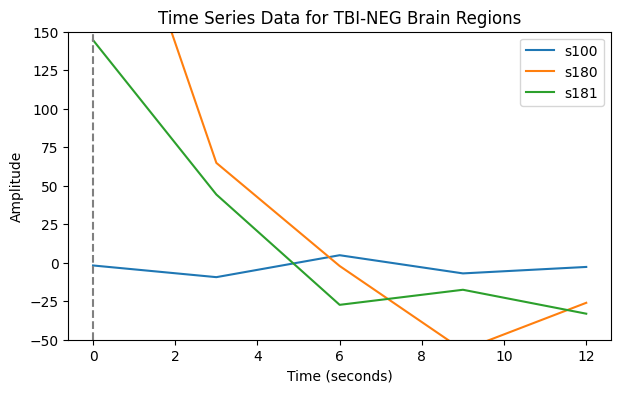

In [ ]:
data = data_neg.loc[0:4, ['s100', 's180','s181']]

time = np.arange(0, len(data)*3, 3) 

plt.figure(figsize=(7,4))
for col in data.columns:
    plt.plot(time, data[col], label=col)
for i in range(0, len(time), int(3/0.33)):
    plt.axvline(x=time[i], color='grey', linestyle='--')
# Customize the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Time Series Data for TBI-NEG Brain Regions')
plt.ylim(-50, 150)
plt.legend()


data = data_pos.loc[0:4, ['s100', 's180','s181']]
time = np.arange(0, len(data)*3, 3) 

plt.figure(figsize=(7,4))
for col in data.columns:
    plt.plot(time, data[col], label=col)
for i in range(0, len(time), int(3/0.33)):
    plt.axvline(x=time[i], color='grey', linestyle='--')
# Customize the plot
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Time Series Data for TBI-NEG Brain Regions')
plt.ylim(-50, 150)
plt.legend()


We can see the differences in the y-axis between the TBI-positive and TBI-negative patients by noting that the amplitude of the signals in the TBI-positive patients is generally higher than in the TBI-negative patients. This could be due to the brain regions being more active or experiencing more physiological changes in the TBI-positive patients.

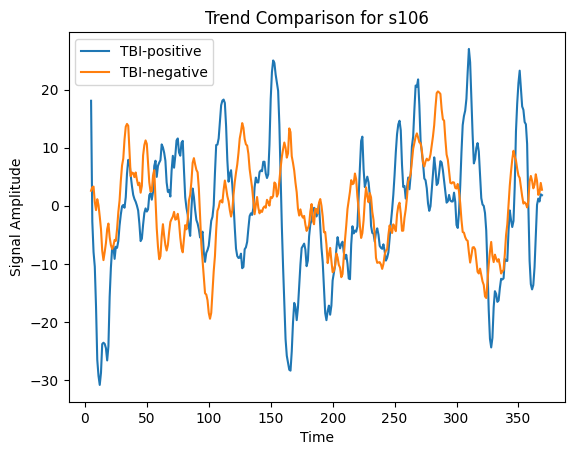

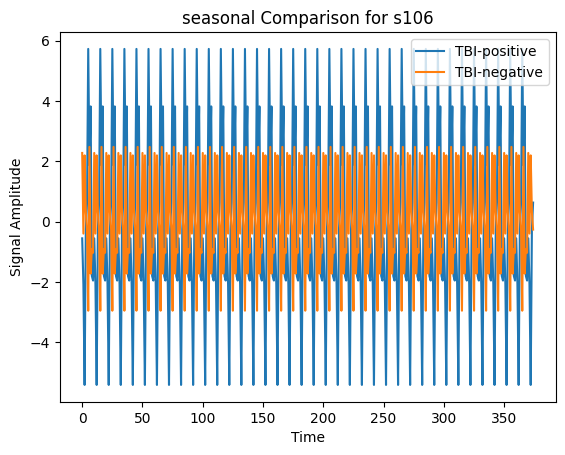

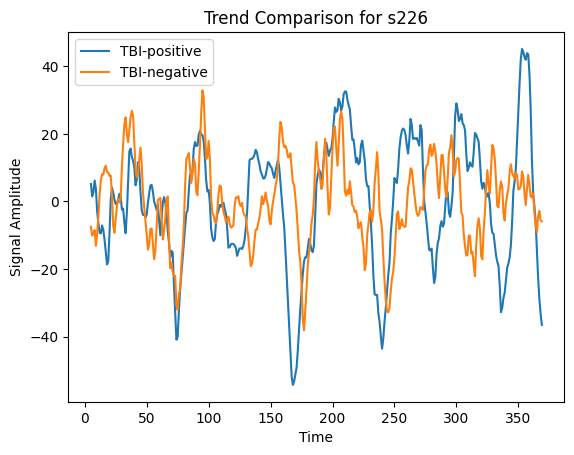

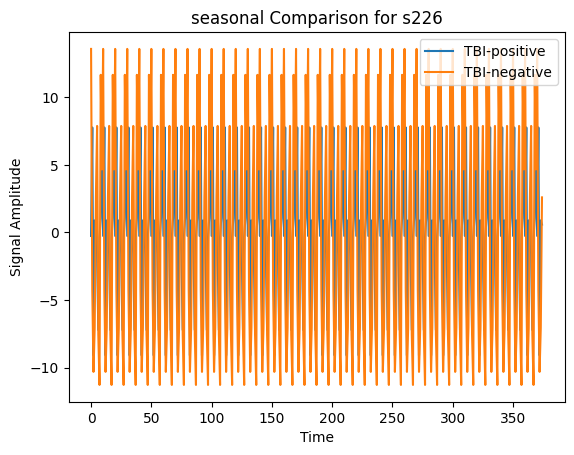

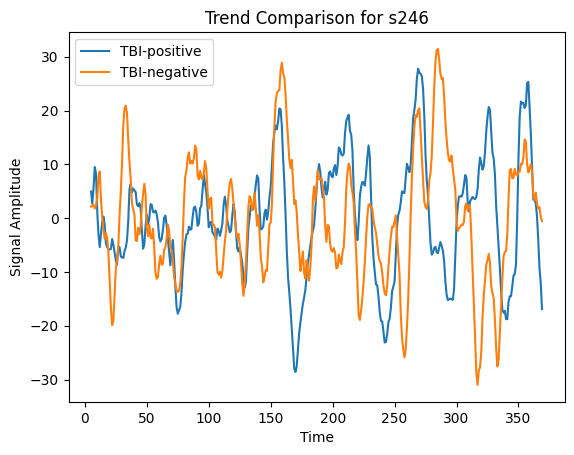

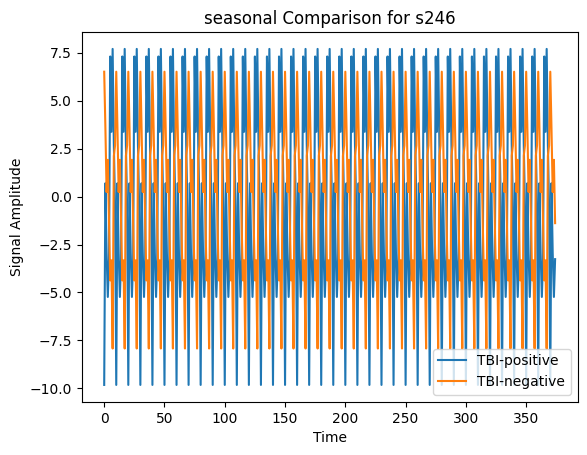

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the TBI-positive and TBI-negative data
pos_data = pd.read_csv('/content/drive/MyDrive/103-DOD-tts_all.csv')
neg_data = pd.read_csv('/content/drive/MyDrive/205-DOD-tts_all.csv')

cols_to_analyze = ['s106', 's226', 's246']

for col in cols_to_analyze:
    pos_decomp = seasonal_decompose(pos_data[col], model='additive', period=10)
    pos_trend = pos_decomp.trend
    pos_seasonal =pos_decomp.seasonal
    
    neg_decomp = seasonal_decompose(neg_data[col], model='additive', period=10)
    neg_trend = neg_decomp.trend
    neg_seasonal =neg_decomp.seasonal
    plt.plot(pos_trend, label='TBI-positive')
    plt.plot(neg_trend, label='TBI-negative')
    plt.title(f'Trend Comparison for {col}')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
    plt.legend()
    plt.show()

    plt.plot(pos_seasonal, label='TBI-positive')
    plt.plot(neg_seasonal, label='TBI-negative')
    plt.title(f'seasonal Comparison for {col}')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
    plt.legend()
    plt.show()



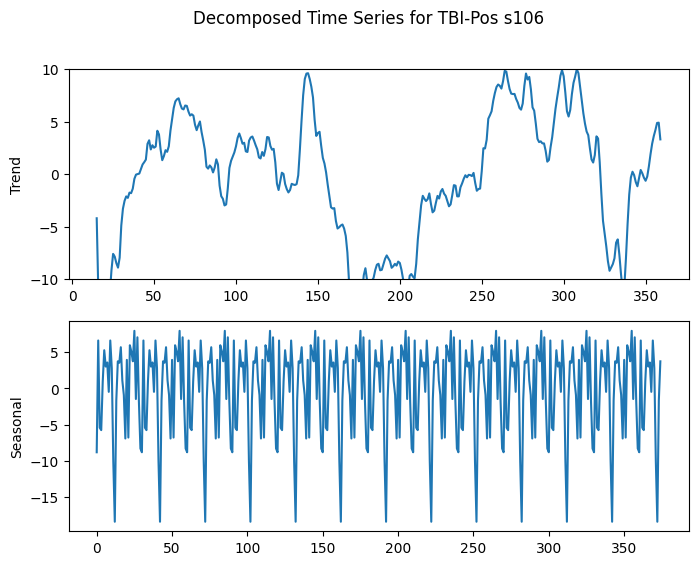

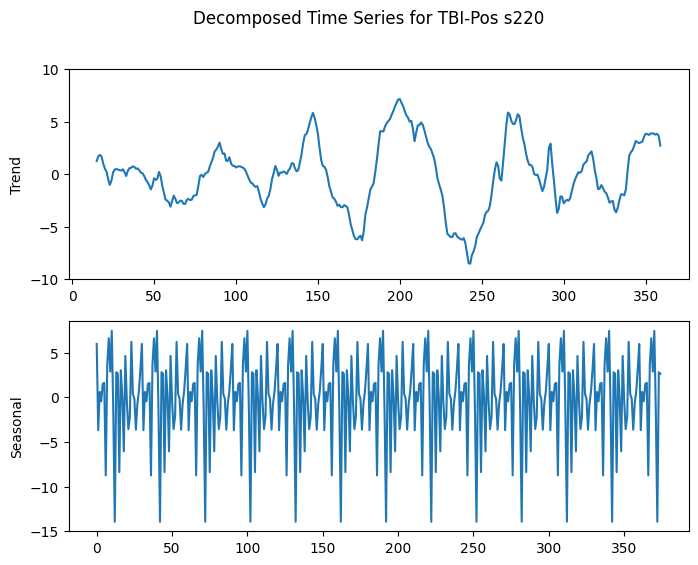

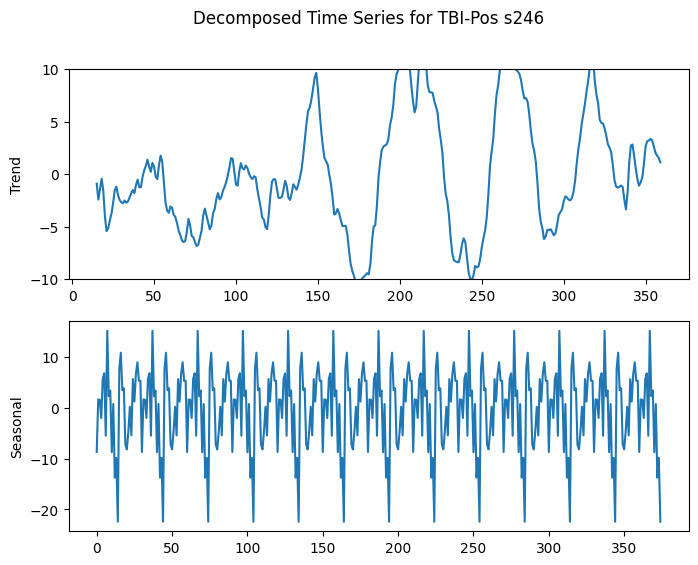

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import numpy as np
# Load your time series data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/103-DOD-tts_all.csv')

# Apply STL decomposition to each column
cols_to_plot = ['s106', 's220','s246']

# loop through columns and plot the decomposed time series
for col in cols_to_plot:
    # perform seasonal decomposition
    result = seasonal_decompose(data[col], model='additive', period=30)  # you can adjust the period as per your need

    # plot the decomposed components
    fig, (ax2,ax3) = plt.subplots(2,1, figsize=(8,6))
    #result.observed.plot(ax=ax1)
    #ax1.set_ylabel('Observed')
    
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    ax2.set_ylim(-10, 10)

   
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')

    #ax4.set_ylabel('Residual')
    plt.suptitle(f'Decomposed Time Series for TBI-Pos {col}')
    plt.show()

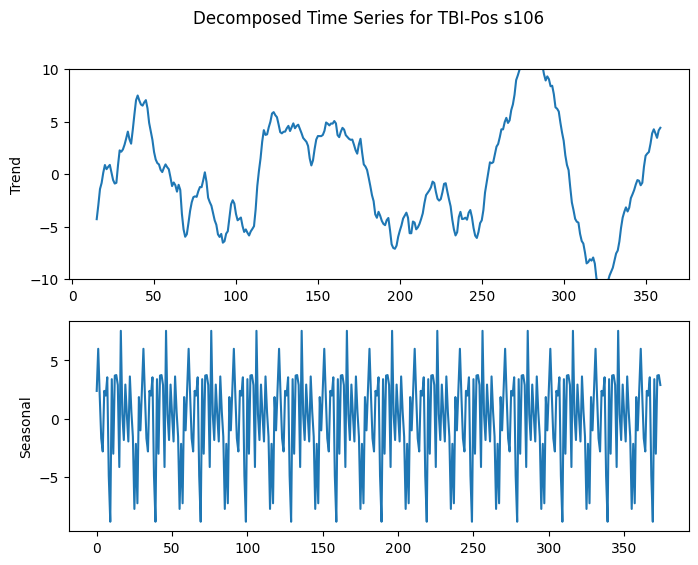

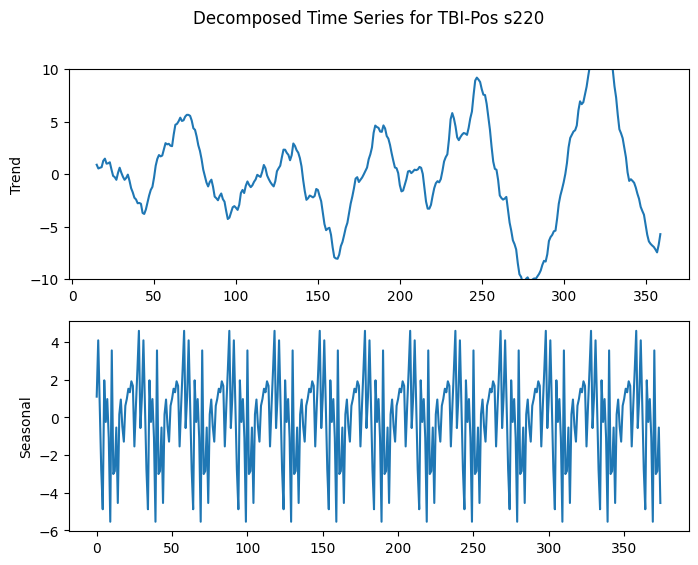

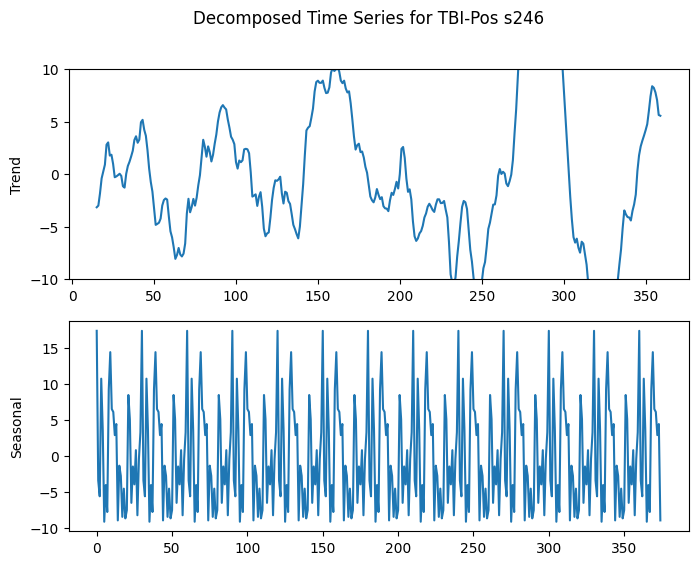

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import numpy as np
# Load your time series data into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/205-DOD-tts_all.csv')

# Apply STL decomposition to each column
cols_to_plot = ['s106', 's220','s246']

# loop through columns and plot the decomposed time series
for col in cols_to_plot:
    # perform seasonal decomposition
    result = seasonal_decompose(data[col], model='additive', period=30)  # you can adjust the period as per your need

    # plot the decomposed components
    fig, (ax2,ax3) = plt.subplots(2,1, figsize=(8,6))
    #result.observed.plot(ax=ax1)
    #ax1.set_ylabel('Observed')
    
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    ax2.set_ylim(-10, 10)

   
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')

    #ax4.set_ylabel('Residual')
    plt.suptitle(f'Decomposed Time Series for TBI-Pos {col}')
    plt.show()

In [ ]:

data = pd.read_csv('/content/drive/MyDrive/205-DOD-tts_all.csv')
data['TBI'] = 'TBI-Neg'

# save the updated data to a new CSV file
data.to_csv('TBI_Neg_Label.csv', index=False)

data = pd.read_csv('/content/drive/MyDrive/102-DOD-tts_all.csv')
data['TBI'] = 'TBI-Pos'

# save the updated data to a new CSV file
data.to_csv('TBI_Pos_Label.csv', index=False)



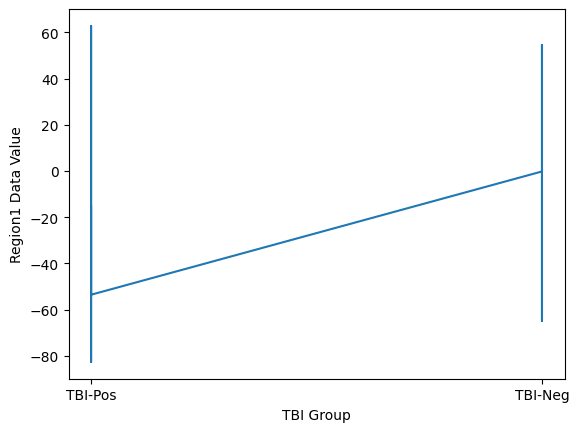

In [ ]:
df_pos = pd.read_csv('TBI_Pos_Label.csv')
df_neg =pd.read_csv('TBI_Neg_Label.csv')
df = pd.concat([df_pos, df_neg])
df_region = df[['TBI', 's155']]
fig, ax = plt.subplots()

ax.plot(df_region['TBI'], df_region['s155'])
ax.set_xlabel('TBI Group')
ax.set_ylabel('Region1 Data Value')
plt.show()

Scatter plot for means of brain region time series for TBI-Pos and TBI-Neg Data

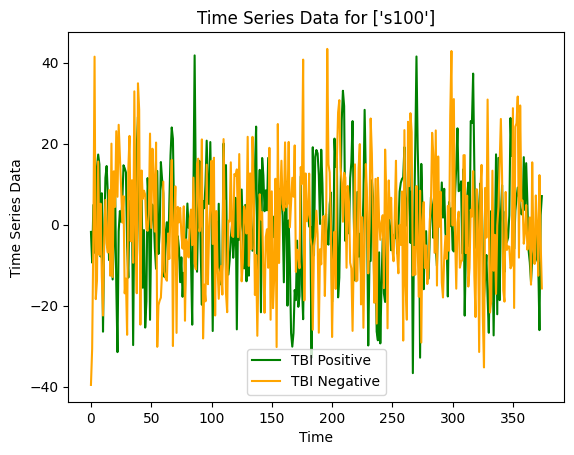

In [ ]:
region = ['s100']
data1 = data_pos[region]
data2 = data_neg[region]
#line plot
plt.plot(range(len(data1)), data1, color='green', label='TBI Positive')
plt.plot(range(len(data2)), data2, color='orange', label='TBI Negative')

plt.xlabel('Time')
plt.ylabel('Time Series Data')

plt.title(f'Time Series Data for {region}')
plt.legend()

plt.show()


Line plot for time series for TBI-Pos and TBI-Neg of s100 brain region

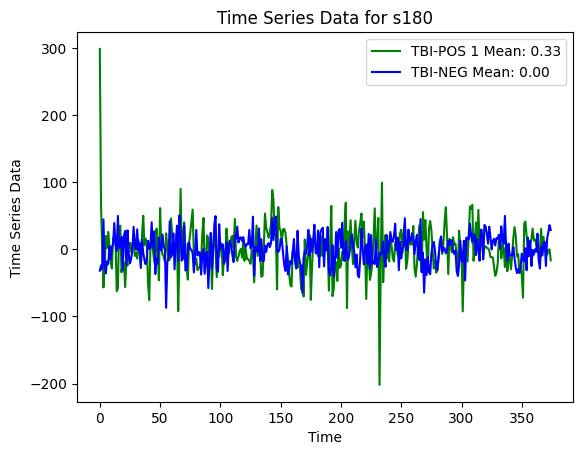

In [ ]:
region = 's180'
data1 = data_pos[region]
data2 = data_neg[region]

mean1 = data1.mean()
mean2 = data2.mean()
plt.plot(range(len(data1)), data1, color='green', label=f'TBI-POS 1 Mean: {mean1:.2f}')
plt.plot(range(len(data2)), data2, color='blue', label=f'TBI-NEG Mean: {mean2:.2f}')

plt.xlabel('Time')
plt.ylabel('Time Series Data')
plt.title(f'Time Series Data for {region}')
plt.legend()
plt.show()




Line plot for TBI-Pos and TBI-Neg data comparison of time series

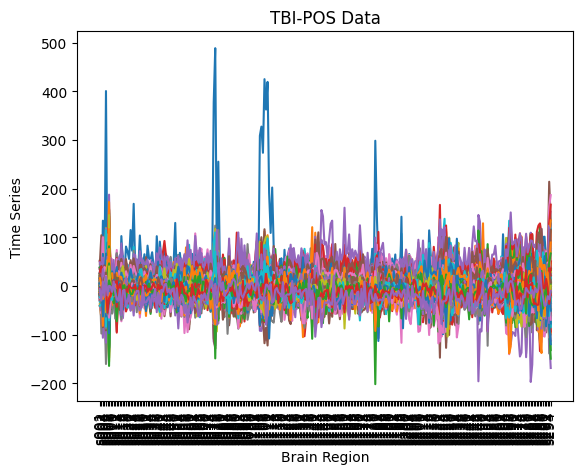

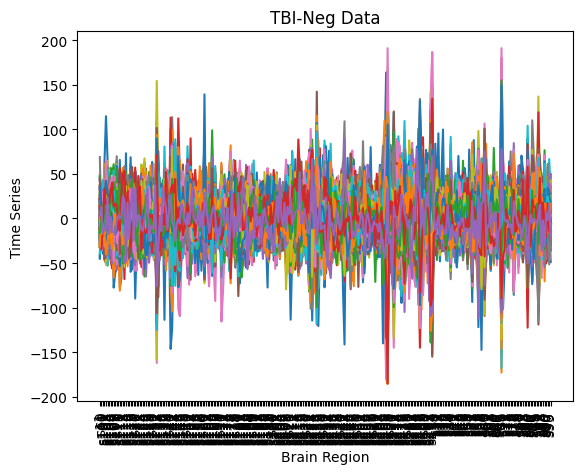

In [ ]:
df = data_pos.T

# Plot line plot
plt.plot(df)
plt.xticks(rotation=90)
plt.xlabel('Brain Region')
plt.ylabel('Time Series')
plt.title('TBI-POS Data')
plt.show()

df = data_neg.T

# Plot line plot
plt.plot(df)
plt.xticks(rotation=90)
plt.xlabel('Brain Region')
plt.ylabel('Time Series')
plt.title('TBI-Neg Data')
plt.show()



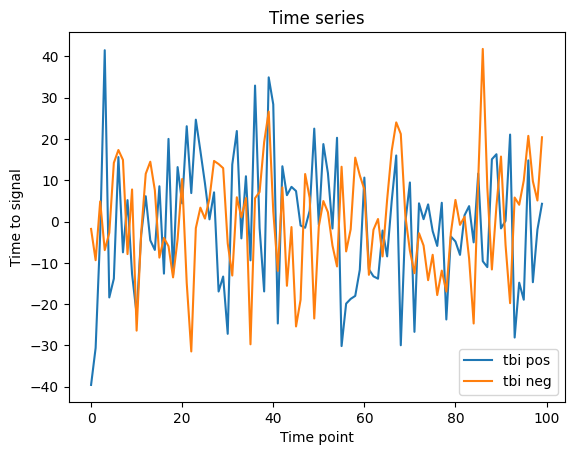

In [ ]:
file_names = ['/content/drive/MyDrive/205-DOD-tts_all.csv', '/content/drive/MyDrive/103-DOD-tts_all.csv']

# Define the column name to plot
column_name = 's100'
fig, ax = plt.subplots()

for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name, nrows=100)
    if i == 0:
        label = 'tbi pos'
    else:
        label = 'tbi neg'
    df[column_name].plot(ax=ax, label=label)

# Customize the plot
ax.set_xlabel('Time point')
ax.set_ylabel('Time to signal')
ax.set_title('Time series')
ax.legend()
plt.show()

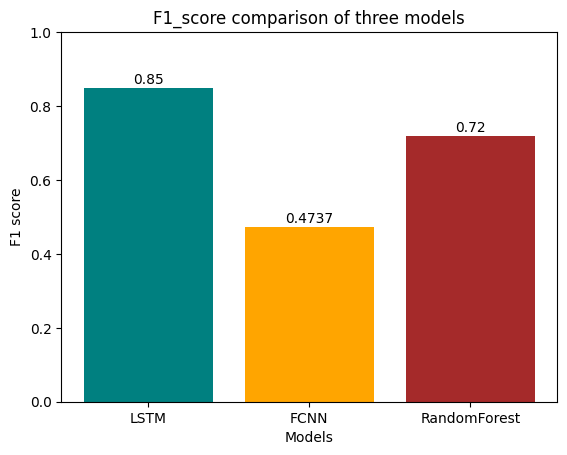

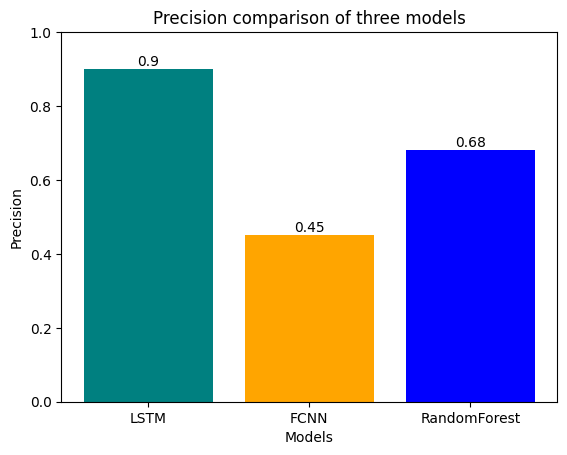

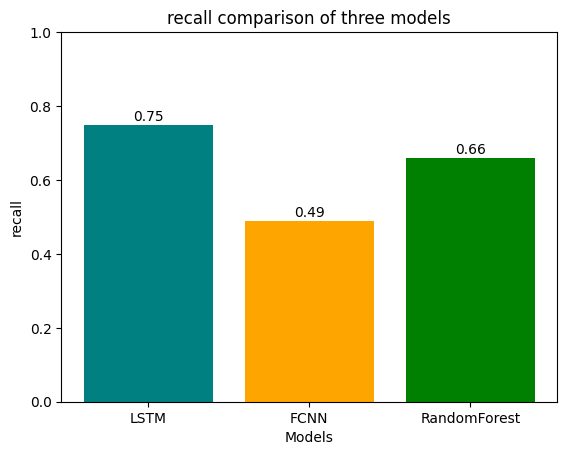

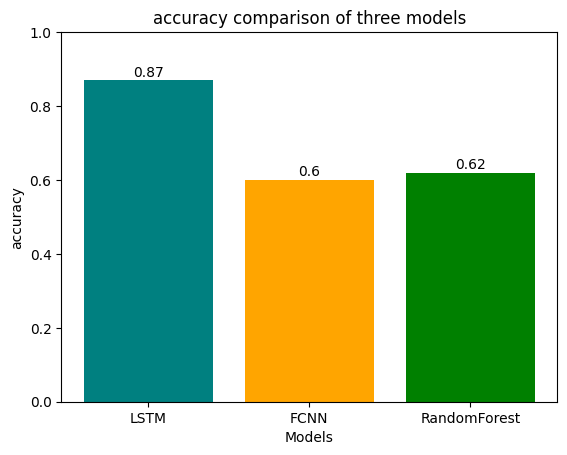

In [60]:


models = ['LSTM', 'FCNN', 'RandomForest']
f1_Score = [0.85, 0.4737, 0.72]
precision =[0.90,0.45,0.68]
recall =[0.75,0.49,0.66]
accuracy =[0.87,0.60,0.62]
colors=['teal','orange','brown']
bar_width=0.25
# Plotting
plt.bar(models, f1_Score, color=colors)

# Setting plot properties
plt.title('F1_score comparison of three models')
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.ylim(0, 1)

for i, f1_score in enumerate(f1_Score):
    plt.text(i,f1_score+0.01, str(f1_score), ha='center', fontsize=10)

# Displaying the plot
plt.show()
colors=['teal','orange','blue']
plt.bar(models, precision, color=colors)
plt.title('Precision comparison of three models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0, 1)
for i, precision in enumerate(precision):
    plt.text(i,precision+0.01, str(precision), ha='center', fontsize=10)
plt.show()

colors=['teal','orange','green']

plt.bar(models, recall, color=colors)
plt.title('recall comparison of three models')
plt.xlabel('Models')
plt.ylabel('recall')
plt.ylim(0, 1)
for i, recall in enumerate(recall):
    plt.text(i,recall+0.01, str(recall), ha='center', fontsize=10)
plt.show()

plt.bar(models, accuracy, color=colors)
plt.title('accuracy comparison of three models')
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.ylim(0, 1)
for i, accuracy in enumerate(accuracy):
    plt.text(i,accuracy+0.01, str(accuracy), ha='center', fontsize=10)

plt.show()








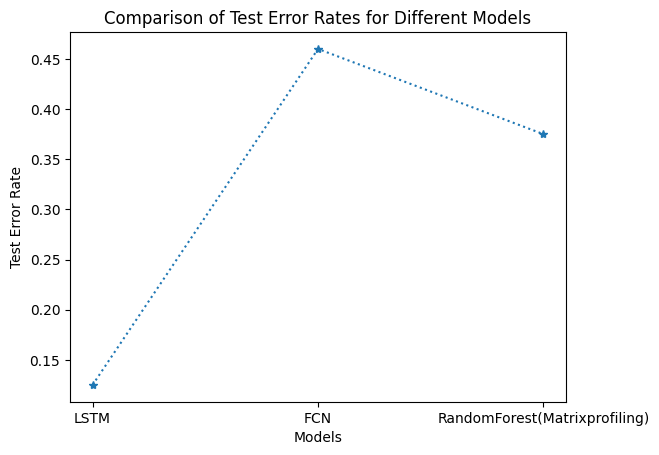

In [ ]:
models = ['LSTM', 'FCN', 'RandomForest(Matrixprofiling)']
test_error_rates = [0.125, 0.460, 0.375]

# Plot the line chart
plt.plot(models, test_error_rates, linestyle='dotted', marker='*')

# Add x and y axis labels and a title
plt.xlabel('Models')
plt.ylabel('Test Error Rate')
plt.title('Comparison of Test Error Rates for Different Models')

# Display the plot
plt.show()